## Skill-Assessment Exercise 10.11

#### PROBLEM

For the system shown in Figure 10.10, where

$$
G(s) = \frac{10}{s(s+1)}
$$

find the phase margin if there is a delay in the forward path of 

__a.__ 0 s

__b.__ 0.1 s

__c.__ 3 s

#### ANSWERS

##### PART A: 0s

Bode plots of the open-loop response of the system are used to determine the phase margin.

For part __a__ with no delay, the system is just G(s), so the Bode plots of G(s) will be generated.

In [1]:
#  Import libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
# Make plots interactable
%matplotlib ipympl

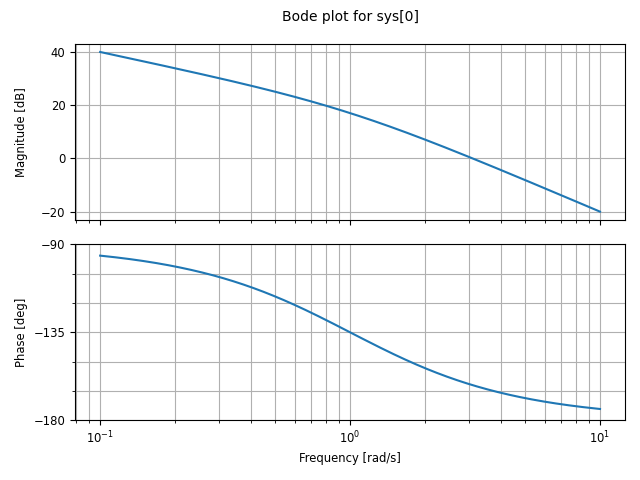

In [2]:
# Generate Bode plots for G(s) with no time delay
numg = [10]
deng = np.poly([0,-1])
G = ct.tf(numg, deng)
fig1 = plt.figure(1)
ct.bode(G, dB=True)

# Clean up unused variables
del fig1

The method of determining phase margin from the open-loop-response Bode plots is to find the phase where the magnitude is 0dB and subtract -180° from that.

In the Bode plots above, 0dB occurs at 3.08 rad/s. At this frequency, the phase is -162°. Thus the phase margin is -162-(-180) = 18°.

##### PART B: Time Delay = 0.1 s

With a time delay of 0.1 seconds, the total system's phase response will change. The `pade` function is used to create a system of pure time delay. Note that this isn't the overall delayed system G'(s); this is just $e^{-j\omega T}$, where $T$ is the time delay of 0.1 seconds here. To get the overall G'(s), $e^{-j\omega T}$ is multiplied with G(s).

With the new G'(s), the phase margin is found using the same process as part a.

TryIt 10.6 MATLAB code was used as a guide to generate the time-delayed system Bode plots.

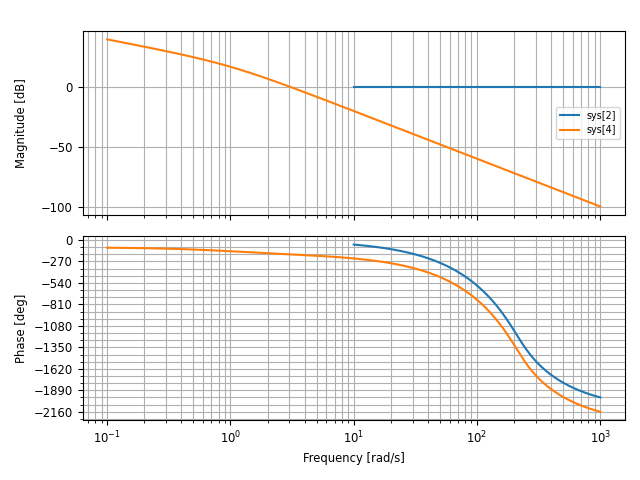

In [ ]:
# Generate Bode plots for G'(s) with time delay = 0.1 s

# Create and plot system of pure time delay
delay = 0.1
order = 12 # MATLAB code uses this value in pade function
numd, dend = ct.pade(delay, order)
Gd = ct.tf(numd, dend) # create delay transfer function
fig2 = plt.figure(2)
ct.bode(Gd, dB=True) # Bode plot delay function

# # Create and plot total system with time delay
Ge = Gd*G
ct.bode(Ge, dB=True)

# Clean up workspace
del delay, order, numd, dend, Gd, fig2, Ge

The overall magnitude of the system doesn't change, meaning 0dB still crosses at the same frequency as before. We go back to 3.08 rad/s and observe that the phase is now -179.7°. The phase margin is then -180°-(-179.7°) = 0.3°.

##### PART C: Time Delay = 3 s

The process is repeated but with T = 3 seconds.

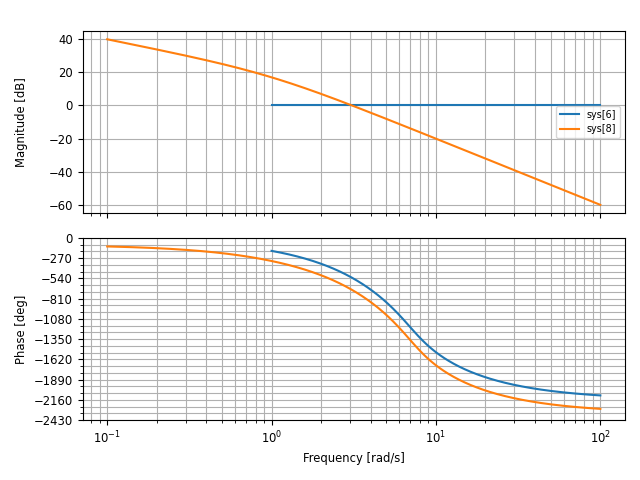

In [4]:
# Generate Bode plots for G'(s) with time delay = 3 s

# Create and plot system of pure time delay
delay = 3
order = 12 # MATLAB code uses this value in pade function
numd, dend = ct.pade(delay, order)
Gd = ct.tf(numd, dend) # create delay transfer function
fig3 = plt.figure(3)
ct.bode(Gd, dB=True) # Bode plot delay function

# # Create and plot total system with time delay
Ge = Gd*G
ct.bode(Ge, dB=True)

# Clean up workspace
del delay, order, numd, dend, Gd, fig2, Ge

The phase at 3.08 rad/s is now -692°. The phase margin is then -180°-(-692°) = -872°. To convert this to 0-180° range, -872° mod -180° = -152°. Since the phase margin is now negative, the system is unstable.